In [15]:
import requests
from bs4 import BeautifulSoup

# URL of the Wikipedia page
url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'

# Make a GET request to fetch the raw HTML content
try:
    response = requests.get(url)
    response.raise_for_status()  # Raises an HTTPError if the response code was not 200

    # Parse the content of the request with BeautifulSoup
    soup = BeautifulSoup(response.text, 'html.parser')

    # Select the first table found in the page which lists the S&P 500 companies
    table = soup.find('table', {'class': 'wikitable sortable'})

    # Initialize a list to store the company symbols
    stocks = []

    # Loop through the rows in the table, skipping the header row
    for row in table.find_all('tr')[1:]:
        cells = row.find_all('td')
        symbol = cells[0].text.strip()  # The first cell in each row contains the symbol
        stocks.append(symbol)

    print(stocks)

except requests.RequestException as e:
    print(e)

['MMM', 'AOS', 'ABT', 'ABBV', 'ACN', 'ADBE', 'AMD', 'AES', 'AFL', 'A', 'APD', 'ABNB', 'AKAM', 'ALB', 'ARE', 'ALGN', 'ALLE', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AMCR', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS', 'AON', 'APA', 'AAPL', 'AMAT', 'APTV', 'ACGL', 'ADM', 'ANET', 'AJG', 'AIZ', 'T', 'ATO', 'ADSK', 'ADP', 'AZO', 'AVB', 'AVY', 'AXON', 'BKR', 'BALL', 'BAC', 'BK', 'BBWI', 'BAX', 'BDX', 'BRK.B', 'BBY', 'BIO', 'TECH', 'BIIB', 'BLK', 'BX', 'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BMY', 'AVGO', 'BR', 'BRO', 'BF.B', 'BLDR', 'BG', 'CDNS', 'CZR', 'CPT', 'CPB', 'COF', 'CAH', 'KMX', 'CCL', 'CARR', 'CTLT', 'CAT', 'CBOE', 'CBRE', 'CDW', 'CE', 'COR', 'CNC', 'CNP', 'CF', 'CHRW', 'CRL', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'COP', 'ED', 'STZ', 'CEG', 'COO', 'CPRT', 'GLW', 'CTVA', 'CSGP', 'COST', 'CTRA', 'CCI', 'CSX', 'CMI', 'CVS', 'DH

In [16]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize


In [17]:
# Set the start and end dates for the past 1 year
start_date = '2023-03-12'
end_date = '2024-03-12'

# Download the stock data
data = yf.download(stocks, start=start_date, end=end_date)['Adj Close']
data

[*********************100%%**********************]  503 of 503 completed

2 Failed downloads:
['BRK.B']: Exception('%ticker%: No timezone found, symbol may be delisted')
['BF.B']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-03-12 -> 2024-03-12)')


Ticker,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2023-03-13,135.703995,14.85,149.671112,146.042908,115.959999,96.235191,65.180000,247.487839,324.269989,179.128189,...,105.173134,63.139832,102.859413,36.979424,96.659332,122.534546,123.293251,284.920013,28.465021,161.946060
2023-03-14,137.401642,14.66,151.779831,147.869049,116.360001,96.588028,67.339996,248.640030,333.329987,183.082657,...,107.232063,63.783115,103.245583,37.550613,98.633987,124.310402,125.654930,292.459991,29.737734,163.085739
2023-03-15,133.063187,13.86,152.177734,148.070862,113.580002,95.852959,62.740002,242.426025,333.609985,179.501068,...,103.797226,65.605766,98.109375,36.644588,95.326447,124.732292,124.295486,287.739990,29.167862,162.104645
2023-03-16,135.833054,14.12,155.022537,149.262665,119.989998,97.058464,66.070000,249.073349,353.290009,183.131714,...,106.351082,65.537537,97.539757,36.871098,95.928711,125.644753,124.464180,294.929993,30.497561,164.820084
2023-03-17,132.219315,13.98,154.177048,148.224655,118.150002,95.078690,63.150002,246.197769,358.140015,182.366348,...,105.955132,65.186646,96.390862,36.319607,93.529503,124.457573,123.352798,288.709991,28.436531,162.996552
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-05,144.350006,14.67,170.119995,179.160004,159.330002,118.480003,87.389999,376.880005,544.840027,189.800003,...,99.769997,48.650002,105.639999,33.270000,126.190002,138.699997,124.779999,284.540009,40.950001,185.229996
2024-03-06,146.220001,14.88,169.119995,181.059998,163.869995,119.339996,88.820000,380.829987,543.090027,191.699997,...,99.139999,48.439999,106.769997,33.410000,126.349998,139.550003,125.830002,287.269989,41.299999,183.529999
2024-03-07,149.309998,14.90,169.000000,180.570007,163.539993,120.919998,87.690002,386.910004,556.039978,198.240005,...,101.110001,50.040001,107.370003,33.419998,126.970001,140.380005,127.360001,288.589996,41.520000,181.509995


In [18]:
data.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Ticker,,,,,,,,
A,251.0,124.746694,10.418640,100.999176,117.138115,126.839310,132.825005,149.309998
AAL,251.0,14.290000,1.693705,10.920000,13.120000,14.280000,14.945000,18.799999
AAPL,251.0,179.566935,10.713977,149.671112,172.608665,180.238235,188.909798,197.857529
ABBV,251.0,148.903044,12.776554,128.530258,140.250519,146.569626,154.366234,181.059998
ABNB,251.0,131.247171,13.714435,104.419998,119.785000,129.039993,142.099998,164.910004
...,...,...,...,...,...,...,...,...
YUM,251.0,129.378552,5.356113,115.126564,125.962872,129.352661,133.840683,140.380005
ZBH,251.0,124.304548,10.843849,102.515511,117.700222,124.010002,132.023956,144.995285
ZBRA,251.0,262.283983,29.317919,197.990005,242.280006,266.380005,283.619995,318.470001


In [19]:
# if null them input previous value 
if data.isnull().values.any():
    data.fillna(method='ffill', inplace=True)
# drop columns with all null values
data.dropna(axis=1, how='all', inplace=True)
data

C:\Users\srika\AppData\Local\Temp\ipykernel_11532\2461652345.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


Ticker,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2023-03-13,135.703995,14.85,149.671112,146.042908,115.959999,96.235191,65.180000,247.487839,324.269989,179.128189,...,105.173134,63.139832,102.859413,36.979424,96.659332,122.534546,123.293251,284.920013,28.465021,161.946060
2023-03-14,137.401642,14.66,151.779831,147.869049,116.360001,96.588028,67.339996,248.640030,333.329987,183.082657,...,107.232063,63.783115,103.245583,37.550613,98.633987,124.310402,125.654930,292.459991,29.737734,163.085739
2023-03-15,133.063187,13.86,152.177734,148.070862,113.580002,95.852959,62.740002,242.426025,333.609985,179.501068,...,103.797226,65.605766,98.109375,36.644588,95.326447,124.732292,124.295486,287.739990,29.167862,162.104645
2023-03-16,135.833054,14.12,155.022537,149.262665,119.989998,97.058464,66.070000,249.073349,353.290009,183.131714,...,106.351082,65.537537,97.539757,36.871098,95.928711,125.644753,124.464180,294.929993,30.497561,164.820084
2023-03-17,132.219315,13.98,154.177048,148.224655,118.150002,95.078690,63.150002,246.197769,358.140015,182.366348,...,105.955132,65.186646,96.390862,36.319607,93.529503,124.457573,123.352798,288.709991,28.436531,162.996552
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-05,144.350006,14.67,170.119995,179.160004,159.330002,118.480003,87.389999,376.880005,544.840027,189.800003,...,99.769997,48.650002,105.639999,33.270000,126.190002,138.699997,124.779999,284.540009,40.950001,185.229996
2024-03-06,146.220001,14.88,169.119995,181.059998,163.869995,119.339996,88.820000,380.829987,543.090027,191.699997,...,99.139999,48.439999,106.769997,33.410000,126.349998,139.550003,125.830002,287.269989,41.299999,183.529999
2024-03-07,149.309998,14.90,169.000000,180.570007,163.539993,120.919998,87.690002,386.910004,556.039978,198.240005,...,101.110001,50.040001,107.370003,33.419998,126.970001,140.380005,127.360001,288.589996,41.520000,181.509995


In [20]:
# Calculate daily returns
returns = data.pct_change().dropna()
returns

C:\Users\srika\AppData\Local\Temp\ipykernel_11532\3287575445.py:2: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Call ffill before calling pct_change to retain current behavior and silence this warning.
  returns = data.pct_change().dropna()


Ticker,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2023-10-05,-0.011821,0.009427,0.007198,-0.001625,-0.018994,0.005750,0.014666,0.000873,-0.003819,-0.009724,...,0.014511,-0.002649,-0.022511,-0.033634,-0.011840,-0.013681,-0.003556,-0.036373,0.002100,0.005907
2023-10-06,0.002628,-0.007004,0.014750,0.005358,0.010961,0.007069,0.006614,0.008170,0.019828,0.010866,...,0.032629,0.015404,-0.016699,0.009323,0.009208,-0.019534,0.014730,0.005887,0.008683,0.020814
2023-10-09,0.005784,-0.040752,0.008451,0.005869,0.011159,-0.001239,-0.001339,-0.000577,0.004956,-0.003736,...,0.007142,0.005231,0.034991,-0.016010,0.001319,-0.004604,-0.001984,-0.005673,0.008311,-0.005582
2023-10-10,0.018063,0.001634,-0.003352,-0.001475,0.029897,0.008268,-0.002559,0.000994,0.006480,0.015290,...,0.009885,0.007112,-0.004237,0.013767,0.009441,0.012278,0.013551,-0.000809,0.033853,0.005899
2023-10-11,0.000794,0.017944,0.007904,0.003022,-0.012083,-0.050431,0.014170,0.004855,0.032268,-0.005967,...,0.007873,0.012918,-0.035853,-0.018519,0.004568,-0.016532,-0.060968,-0.023561,0.015091,0.007516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-05,0.010430,-0.009453,-0.028441,0.011918,0.007844,-0.012996,0.002869,-0.017800,-0.040673,-0.024967,...,0.000401,-0.047199,0.012265,-0.000300,-0.012984,0.001083,-0.005816,-0.024378,0.045443,-0.014000
2024-03-06,0.012955,0.014315,-0.005878,0.010605,0.028494,0.007259,0.016363,0.010481,-0.003212,0.010011,...,-0.006314,-0.004317,0.010697,0.004208,0.001268,0.006128,0.008415,0.009594,0.008547,-0.009178
2024-03-07,0.021133,0.001344,-0.000710,-0.002706,-0.002014,0.013239,-0.012722,0.015965,0.023845,0.034116,...,0.019871,0.033031,0.005620,0.000299,0.004907,0.005948,0.012159,0.004595,0.005327,-0.011006


In [21]:
returns.mean()

Ticker
A       0.002749
AAL     0.001632
AAPL    0.000038
ABBV    0.002047
ABNB    0.002537
          ...   
YUM     0.001301
ZBH     0.001542
ZBRA    0.002138
ZION    0.002728
ZTS     0.000835
Length: 501, dtype: float64

In [22]:
# Calculate mean returns and covariance of returns
mean_returns = returns.mean()
cov_matrix = returns.cov()

# Annualize the risk and returns
annual_mean_returns = mean_returns * 252
annual_cov_matrix = cov_matrix * 252

In [23]:
# Calculate volatility (standard deviation)
volatility = np.sqrt(np.diag(annual_cov_matrix))

# Check the sizes of volatility and annual_mean_returns arrays
print(len(volatility), len(annual_mean_returns))

# Now, let's plot to visualize the data before the error occurred

501 501


501


C:\Users\srika\AppData\Local\Temp\ipykernel_11532\2393580465.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(txt, (volatility[i], annual_mean_returns[i]))


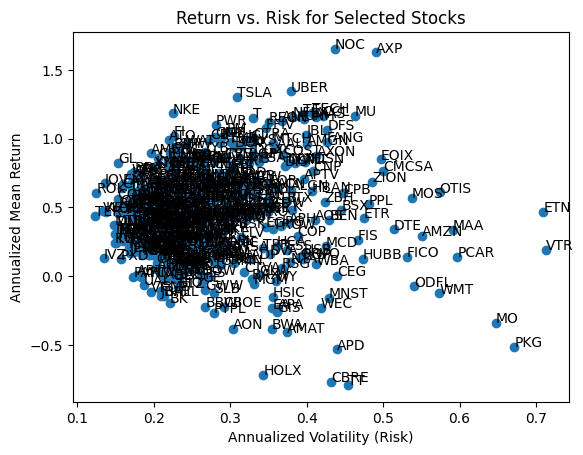

In [24]:
# Filter the stocks list to include only symbols with corresponding data
stocks = [symbol for symbol in stocks if symbol in data.columns]

# Check the length of the filtered stocks list
print(len(stocks))

# Plotting
plt.scatter(volatility, annual_mean_returns, marker='o')
for i, txt in enumerate(stocks):
    plt.annotate(txt, (volatility[i], annual_mean_returns[i]))
plt.xlabel('Annualized Volatility (Risk)')
plt.ylabel('Annualized Mean Return')
plt.title('Return vs. Risk for Selected Stocks')
plt.show()

In [25]:
def portfolio_annual_performance(weights, mean_returns, cov_matrix):
    return np.sum(mean_returns*weights ) *252, np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)

def neg_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate=0.01):
    p_var, p_ret = portfolio_annual_performance(weights, mean_returns, cov_matrix)
    return -(p_ret - risk_free_rate) / p_var

def max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate=0.01):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix, risk_free_rate)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bounds = tuple((0, 1) for asset in range(num_assets))
    result = minimize(neg_sharpe_ratio, num_assets*[1./num_assets,], args=args,
                      method='SLSQP', bounds=bounds, constraints=constraints)
    return result

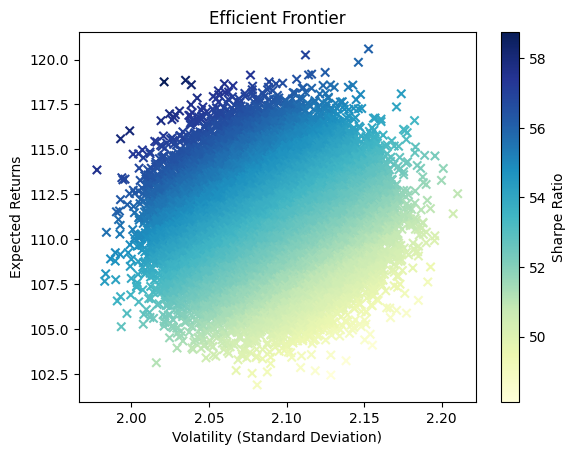

In [26]:
def efficient_frontier(mean_returns, cov_matrix, risk_free_rate=0.01):
    num_assets = len(mean_returns)
    results = np.zeros((3, num_assets*100))
    weights_record = []
    for i in range(num_assets*100):
        weights = np.random.random(num_assets)
        weights /= np.sum(weights)
        weights_record.append(weights)
        portfolio_return, portfolio_volatility = portfolio_annual_performance(weights, mean_returns, cov_matrix)
        results[0,i] = portfolio_volatility
        results[1,i] = portfolio_return
        results[2,i] = (portfolio_return - risk_free_rate) / portfolio_volatility
    return results, weights_record

results, weights = efficient_frontier(annual_mean_returns, annual_cov_matrix)

# Plotting the efficient frontier
plt.scatter(results[0,:], results[1,:], c=results[2,:], cmap='YlGnBu', marker='x')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility (Standard Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()


      allocation
MMM         0.10
AOS         0.10
ABT         0.10
ABBV        0.10
ACN         0.10
...          ...
YUM         0.10
ZBRA        0.10
ZBH         0.13
ZION        0.15
ZTS         0.10

[501 rows x 1 columns]


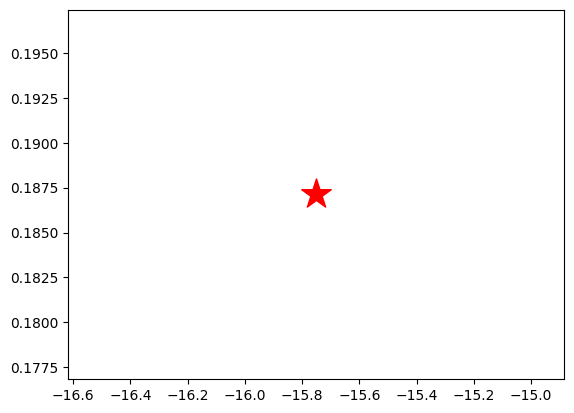

In [27]:
max_sharpe = max_sharpe_ratio(annual_mean_returns, annual_cov_matrix)
max_sharpe_allocation = pd.DataFrame(max_sharpe.x,index=stocks,columns=['allocation'])
max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
print(max_sharpe_allocation)

# Add marker for the max Sharpe ratio portfolio on the plot
plt.scatter(max_sharpe.fun, portfolio_annual_performance(max_sharpe.x, annual_mean_returns, annual_cov_matrix)[0], color='r', marker='*', s=500)